# MNIST 예측 모델 성능개선

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
# 학습결과 그래프 함수
# loss 그래프
def loss_plot(history):
    plt.figure(figsize=(10,7))
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, 0.5)
    plt.legend()
    plt.show()

In [3]:
# accuracy 그래프
def accuracy_plot(history):
    plt.figure(figsize=(10,7))
    plt.plot(history.history['accuracy'], label='Train accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.ylim(0.8, 1.0)
    plt.legend()
    plt.show()

In [4]:
# Data 로딩
(train_image, train_labels), (test_image, test_labels) = keras.datasets.mnist.load_data()
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
learning_rate = 0.001
N_EPOCHS = 130
N_BATCH = 200

N_CLASS = 10 # label의 클래스(범주) 개수

N_TRAIN = train_image.shape[0]  
N_TEST = test_image.shape[0]

In [6]:
# 전처리
## image를 0~1사이 값으로 만들기 위하여 255로 나누어줌
X_train = train_image/255
X_test = test_image/255

In [7]:
# Y를 원핫인코딩
y_train = keras.utils.to_categorical(train_labels, N_CLASS)
y_test = keras.utils.to_categorical(test_labels, N_CLASS)

In [8]:
# Dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(100000)\
                               .batch(N_BATCH, drop_remainder=True).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCH)

In [9]:
N_EPOCHS=130
dropout_rate=0.3
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    # hidden layer - Dense layer: 4, unit 256, 256, 128, 128  activation=relu
    # Dropout, BatchNormalization 적용
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(512))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(512))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(64))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(64))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    # output layer
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    return model

In [10]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate), loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(train_dataset, 
                    epochs=N_EPOCHS
                    validation_data=test_dataset)

Epoch 1/130
300/300 [==============================] - 11s 30ms/step - loss: 1.3772 - accuracy: 0.5345 - val_loss: 0.3510 - val_accuracy: 0.9099
Epoch 2/130
300/300 [==============================] - 10s 32ms/step - loss: 0.5115 - accuracy: 0.8628 - val_loss: 0.2069 - val_accuracy: 0.9489
Epoch 3/130
300/300 [==============================] - 10s 31ms/step - loss: 0.3836 - accuracy: 0.9043 - val_loss: 0.1723 - val_accuracy: 0.9584
Epoch 4/130
300/300 [==============================] - 10s 32ms/step - loss: 0.3169 - accuracy: 0.9223 - val_loss: 0.1420 - val_accuracy: 0.9644
Epoch 5/130
300/300 [==============================] - 10s 32ms/step - loss: 0.2841 - accuracy: 0.9301 - val_loss: 0.1165 - val_accuracy: 0.9700
Epoch 6/130
300/300 [==============================] - 10s 33ms/step - loss: 0.2568 - accuracy: 0.9377 - val_loss: 0.1217 - val_accuracy: 0.9696
Epoch 7/130
300/300 [==============================] - 10s 33ms/step - loss: 0.2381 - accuracy: 0.9420 - val_loss: 0.0988 - val_ac

300/300 [==============================] - 13s 41ms/step - loss: 0.0454 - accuracy: 0.9879 - val_loss: 0.0545 - val_accuracy: 0.9877
Epoch 114/130
300/300 [==============================] - 15s 49ms/step - loss: 0.0505 - accuracy: 0.9869 - val_loss: 0.0581 - val_accuracy: 0.9874
Epoch 115/130
300/300 [==============================] - 12s 40ms/step - loss: 0.0464 - accuracy: 0.9882 - val_loss: 0.0531 - val_accuracy: 0.9886
Epoch 116/130
300/300 [==============================] - 13s 41ms/step - loss: 0.0464 - accuracy: 0.9878 - val_loss: 0.0518 - val_accuracy: 0.9891
Epoch 117/130
300/300 [==============================] - 12s 40ms/step - loss: 0.0454 - accuracy: 0.9879 - val_loss: 0.0539 - val_accuracy: 0.9883
Epoch 118/130
300/300 [==============================] - 12s 40ms/step - loss: 0.0453 - accuracy: 0.9880 - val_loss: 0.0513 - val_accuracy: 0.9882
Epoch 119/130
300/300 [==============================] - 12s 40ms/step - loss: 0.0431 - accuracy: 0.9884 - val_loss: 0.0507 - val_ac

In [15]:
model.evaluate(test_dataset)

50/50 [==============================] - 0s 9ms/step - loss: 0.0559 - accuracy: 0.9885


[0.055856719613075256, 0.9884999990463257]

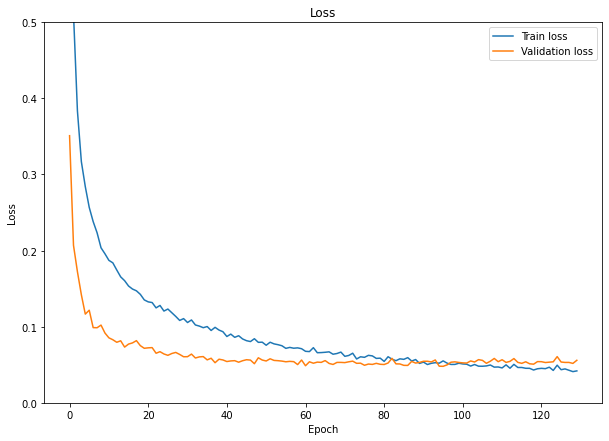

In [17]:
loss_plot(history)

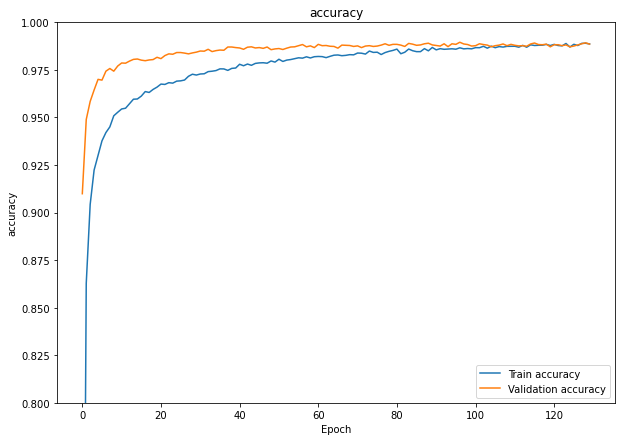

In [18]:
accuracy_plot(history)